In [10]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [11]:
batch_size = 100
img_height = 352
img_width = 640

In [12]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './accident/train/',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './accident/test/',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    './accident/val/',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [15]:
class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
img_shape = (img_height, img_width, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

C:\Users\hugol\AppData\Local\Temp\ipykernel_22940\451698701.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,


In [17]:
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
retVal = model.fit(training_ds, validation_data= validation_ds, epochs = 10)

Epoch 1/10


3/8 ━━━━━━━━━━━━━━━━━━━━ 4:17 51s/step - accuracy: 0.5544 - loss: 40.2944

KeyboardInterrupt: 

In [9]:
print(testing_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 352, 352, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step


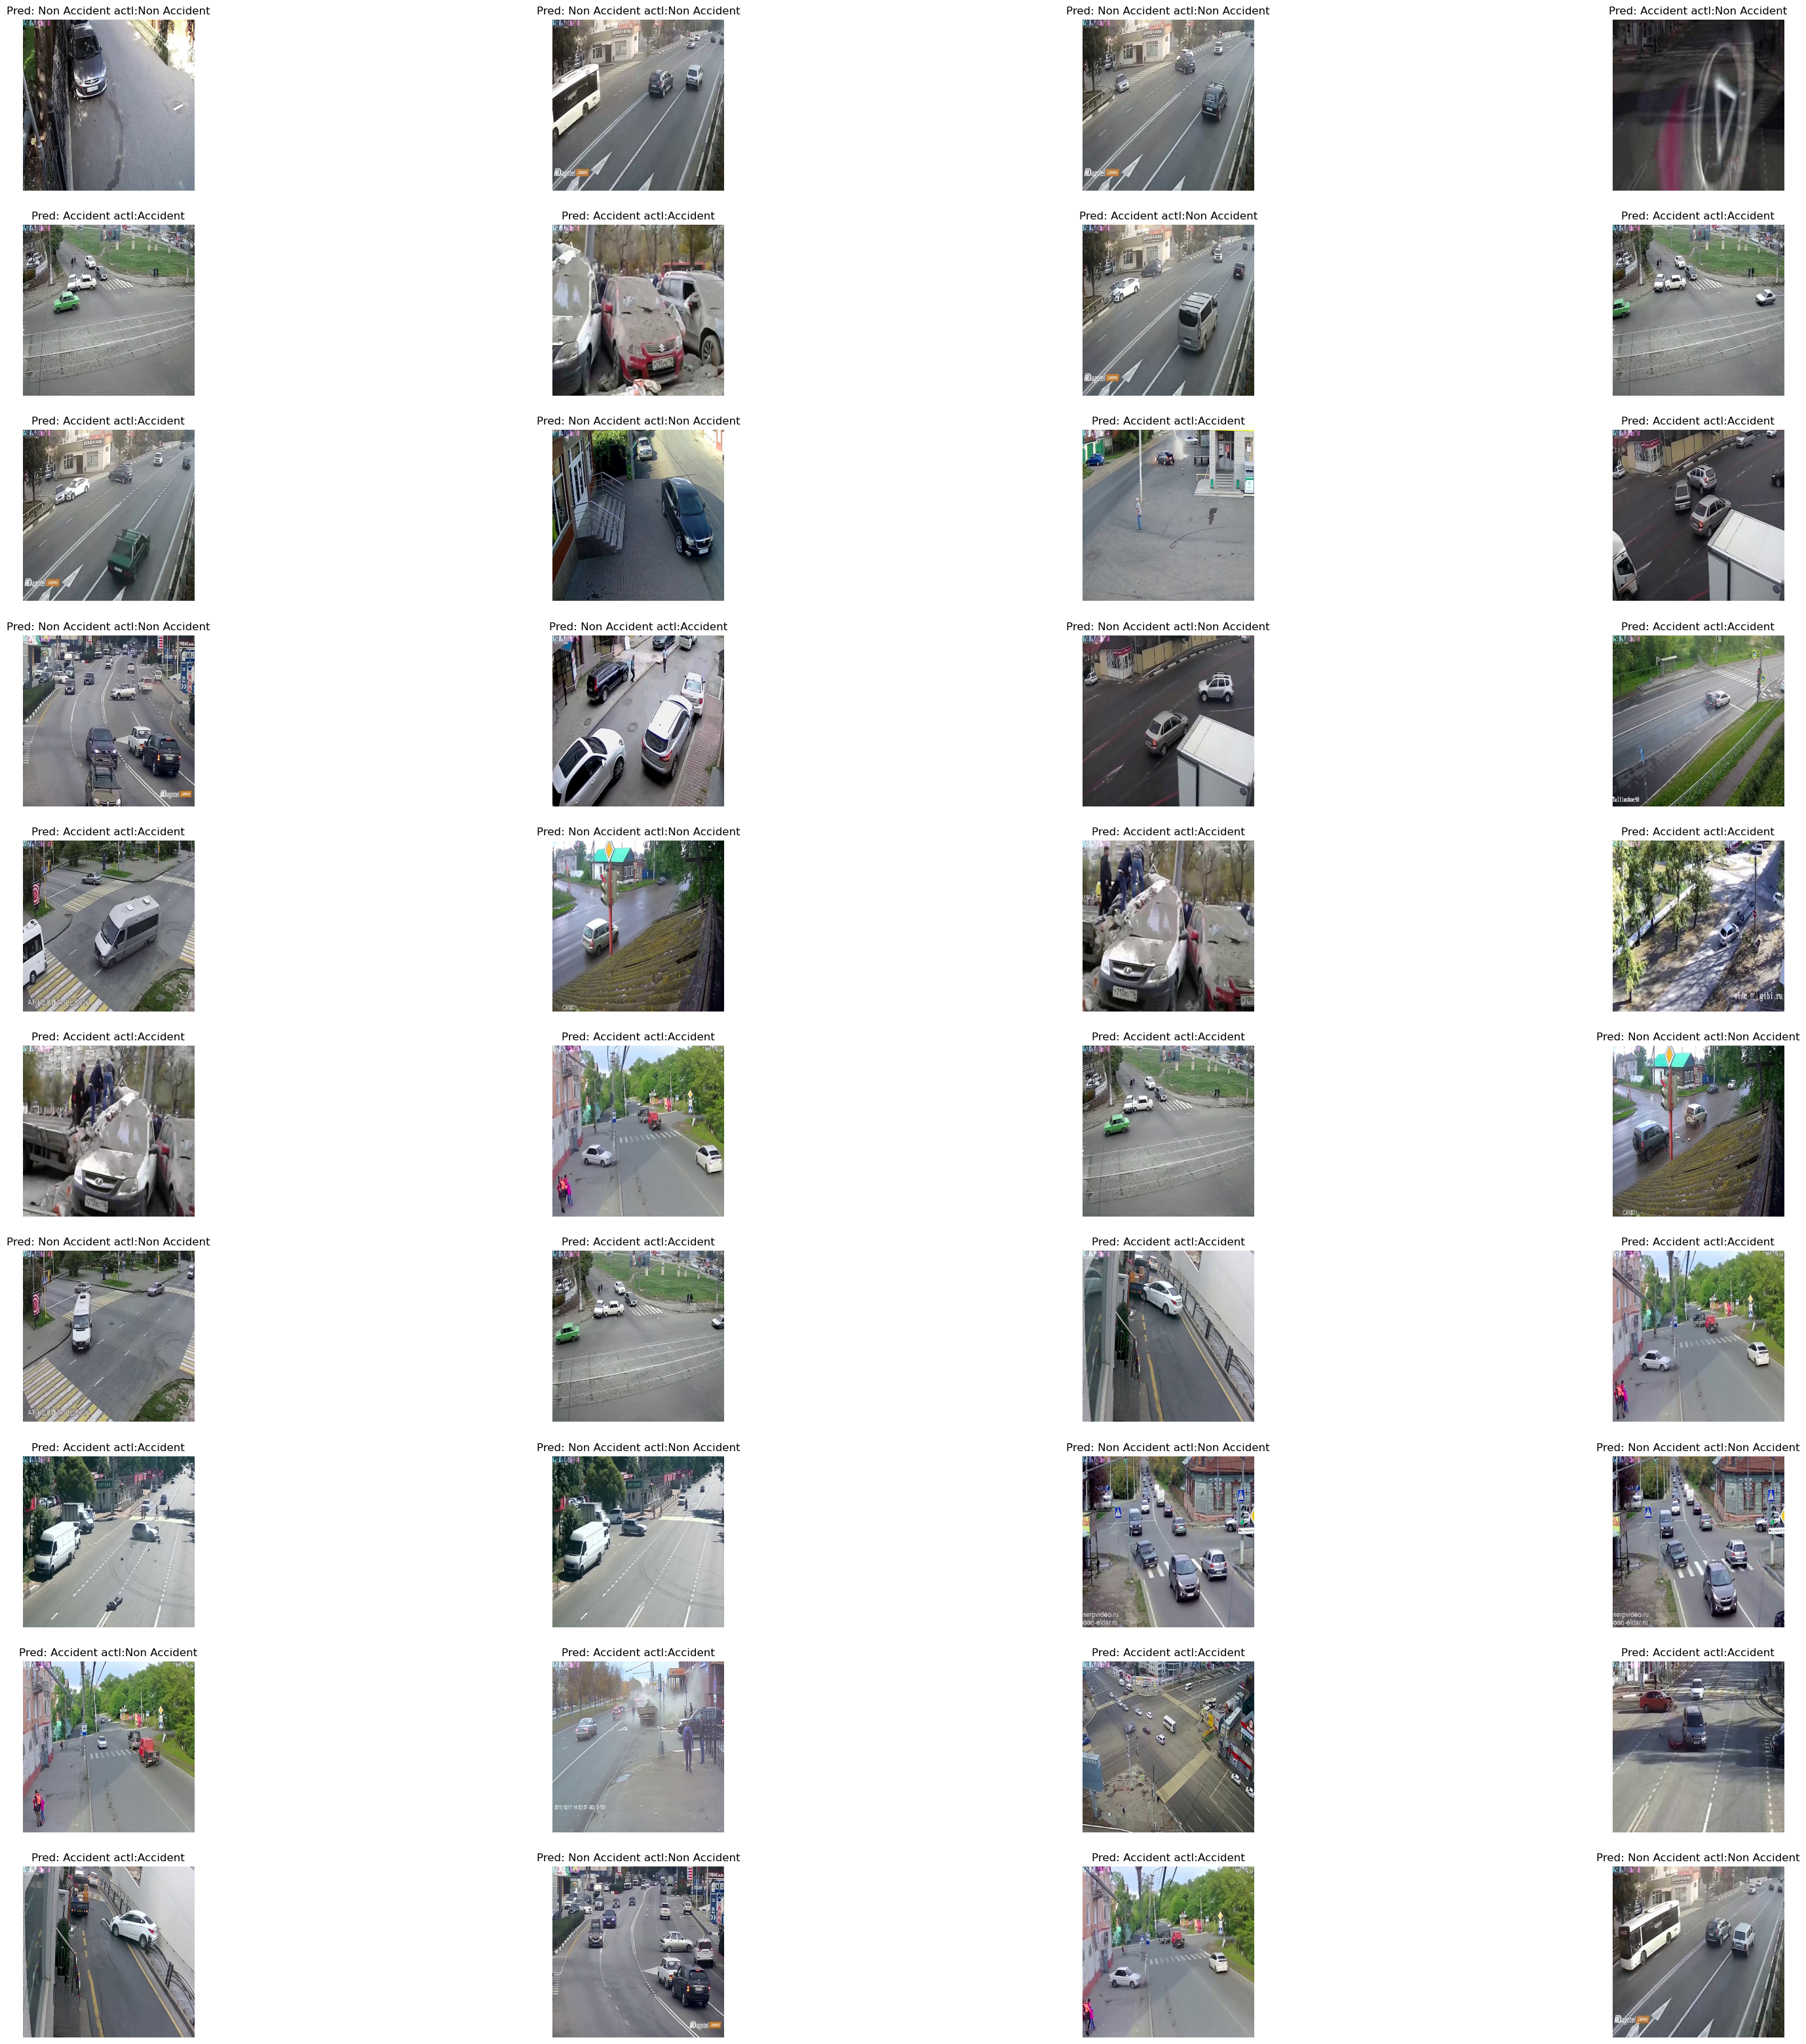

In [30]:
AccuracyVector = []
plt.figure(figsize=(40, 40))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [13]:
model.save('Model.keras')

In [12]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) > 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

In [ ]:
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [24]:
from ultralytics import YOLO
import torch

device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f'Using device: {device}')

#Load a model
model = YOLO("./yolov8s.pt")  # build a new model from scratch
#Use the model
model.train(data="C:/Users/hugol/Desktop/2023-2024/deep_learning/fil_rouge/data/data.yaml", device=device, epochs=1, batch=16)  # train the model

Using device: cpu
New https://pypi.org/project/ultralytics/8.1.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.28 🚀 Python-3.10.0 torch-2.2.1 CPU (AMD Ryzen 7 5800H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=./yolov8s.pt, data=C:/Users/hugol/Desktop/2023-2024/deep_learning/fil_rouge/data/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nm

train: Scanning C:\Users\hugol\Desktop\2023-2024\deep_learning\fil_rouge\data\train\labels... 3933 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3933/3933 [00:04<00:00, 819.54it/s]


train: New cache created: C:\Users\hugol\Desktop\2023-2024\deep_learning\fil_rouge\data\train\labels.cache


val: Scanning C:\Users\hugol\Desktop\2023-2024\deep_learning\fil_rouge\data\valid\labels... 437 images, 0 backgrounds, 0 corrupt: 100%|██████████| 437/437 [00:00<00:00, 914.53it/s]


val: New cache created: C:\Users\hugol\Desktop\2023-2024\deep_learning\fil_rouge\data\valid\labels.cache
Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train4
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.698      2.242      1.872         65        640: 100%|██████████| 246/246 [57:08<00:00, 13.94s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [02:07<00:00,  9.13s/it]


                   all        437        745      0.363      0.383      0.304      0.109

1 epochs completed in 0.991 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 22.5MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics YOLOv8.1.28 🚀 Python-3.10.0 torch-2.2.1 CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [27:10<00:00, 116.48s/it]


                   all        437        745      0.359      0.381      0.303      0.109
              accident        437        185      0.544        0.6      0.518      0.199
                   car        437        371      0.327      0.442      0.308      0.106
                  fire        437        189      0.205      0.101      0.083     0.0212
Speed: 4.1ms preprocess, 3718.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000208A427A200>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

In [29]:
#Load the YOLOv8 model
model = YOLO('C:/Users/hugol/Desktop/2023-2024/deep_learning/fil_rouge/runs/detect/train4/weights/best.pt')
model = YOLO('yolov8s.pt')
#Open the video file
source = './photo_accident.png'

results = model(source)
for r in results:
    print(r.boxes)


image 1/1 c:\Users\hugol\Desktop\2023-2024\deep_learning\fil_rouge\photo_accident.png: 352x640 4 persons, 1 car, 1 motorcycle, 100.1ms
Speed: 2.0ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 352, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 3., 0., 0., 0., 0.])
conf: tensor([0.8357, 0.4847, 0.4533, 0.3917, 0.2766, 0.2627])
data: tensor([[1.4025e+03, 4.1190e+02, 1.6155e+03, 5.6018e+02, 8.3568e-01, 2.0000e+00],
        [1.7204e+03, 4.9128e+02, 1.8032e+03, 5.7267e+02, 4.8471e-01, 3.0000e+00],
        [1.3616e+03, 3.4691e+02, 1.4041e+03, 4.4353e+02, 4.5330e-01, 0.0000e+00],
        [1.4584e+03, 3.5132e+02, 1.4936e+03, 4.4142e+02, 3.9172e-01, 0.0000e+00],
        [1.7574e+03, 4.4178e+02, 1.8034e+03, 5.5179e+02, 2.7657e-01, 0.0000e+00],
        [1.4482e+03, 3.5086e+02, 1.4941e+03, 4.5179e+02, 2.6267e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (991, 1804)
shape: torch.Size([6, 6])
xywh: tensor([[1508.9807,  486.04